<a href="https://colab.research.google.com/github/anshulmathur13/CodSoft/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Impoting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importing Dataset
from google.colab import files
uploaded = files.upload()


Saving tested.csv to tested (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tested (2).csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#Analyzing different factor affecting Passenger count

In [ ]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

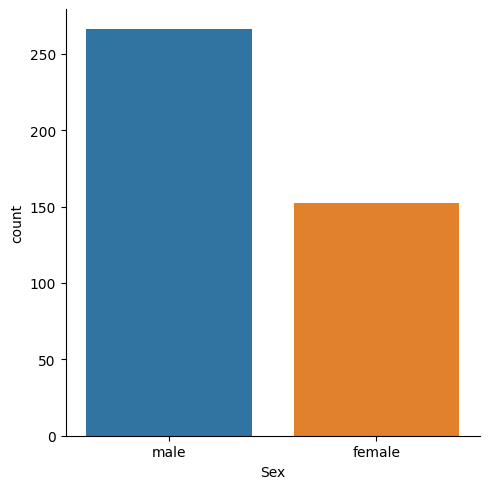

In [ ]:
sns.catplot(x= 'Sex', data=df,kind="count")

In [ ]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,107,107,107,107,98,107,107,107,107,80,107
2,93,93,93,93,88,93,93,93,93,7,93
3,218,218,218,218,146,218,218,218,217,4,218


In [ ]:
df.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     50
        male       57
2       female     30
        male       63
3       female     72
        male      146
dtype: int64

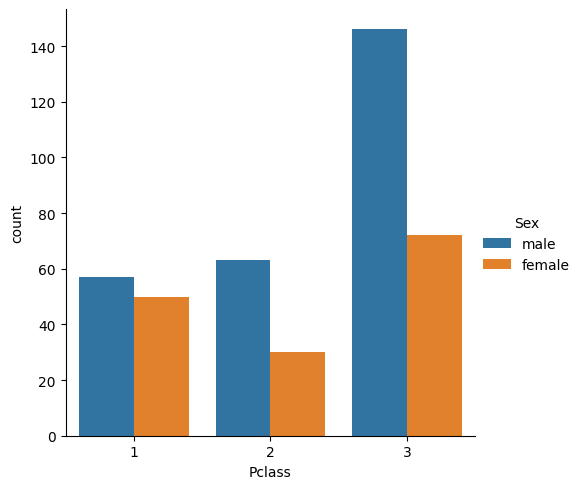

In [ ]:
sns.catplot(x='Pclass',data=df,kind="count",hue="Sex")

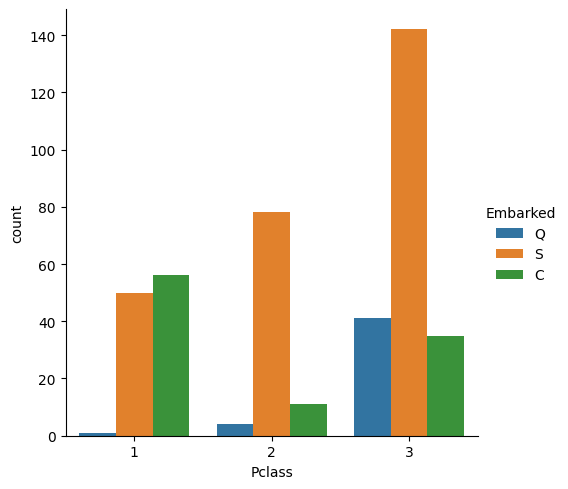

In [ ]:
sns.catplot(x='Pclass',data=df,kind="count",hue="Embarked")

<Axes: >

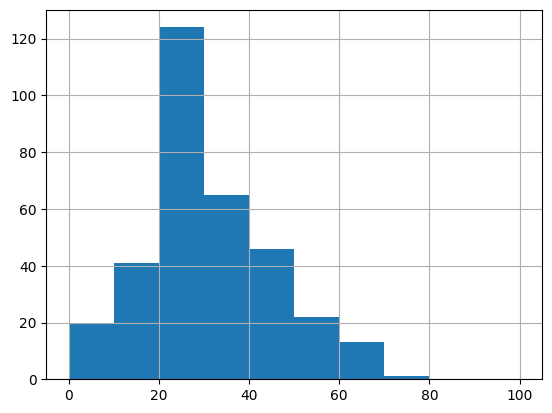

In [ ]:
df['Age'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100])

In [ ]:
#Creating Machine learning model

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
y=df.Survived
x=df[['PassengerId','Pclass','Parch']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=404,test_size=.25)
x_train

,PassengerId,Pclass,Parch
26,918,1,1
147,1039,3,0
354,1246,3,2
47,939,3,0
132,1024,3,4
...,...,...,...
399,1291,3,0
182,1074,1,0
362,1254,2,0
252,1144,1,0


In [ ]:
x_test

,PassengerId,Pclass,Parch
94,986,1,0
190,1082,2,0
356,1248,1,0
134,1026,3,0
145,1037,3,0
...,...,...,...
78,970,2,0
290,1182,1,0
196,1088,1,2
265,1157,3,0


In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
#Prediction on basis of PassengerId

In [ ]:
df1=pd.DataFrame(np.array([x_test.iloc[:,0],y_pred]))
df1

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,986,1082,1248,1026,1037,1304,1241,928,1284,1076,...,913,1164,1263,1121,1139,970,1182,1088,1157,1073
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
#Prediction on basis of Pclass

In [ ]:
df2=pd.DataFrame(np.array([x_test.iloc[:,1],y_pred]))
df2

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1,2,1,3,3,3,2,3,3,1,...,3,1,1,2,2,2,1,1,3,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
#Prediction on basis of Parch

In [ ]:
df3=pd.DataFrame(np.array([x_test.iloc[:,2],y_pred]))
df3

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0,0,0,0,0,0,0,0,2,1,...,1,0,0,0,1,0,0,2,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
score = clf.score(x_test, y_test)
score

0.6666666666666666